In [403]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
from matplotlib import cm

file=r"data_data.csv"
datafile=pd.read_csv(file,encoding="utf8")
datafile.head()


,Number_of_employees,Is_your_employer_a_tech_company,Does_your_medical_coverage_include_treatment_of_mental_health,Do_you_currently_have_a_mental_health_disorder,Do_you_know__the_options_for_mental_health_care_available_under_your_employer-provided_health_coverage,Have_you_ever_been_diagnosed_wit__a_mental_health_disorder,Have_you_had_a_mental_health_disorder_in_the_past,Do_you_have_a_family_history_of_mental_illness,What_is_your_age,What_is_your_gender,...,"Eating_Disorder_(Anorexia,_Bulimia,_etc)",Attention_Deficit_Hyperactivity_Disorder,"Personality_Disorder_(Borderline,_Antisocial,_Paranoid,_etc)",Obsessive-Compulsive_Disorder,Post_traumatic_Stress_Disorder,Stress_Response_Syndromes,Dissociative_Disorder,Substance_Use_Disorder,Addictive_Disorder,Other
0,More than 1000,Yes,No,Possibly,Yes,No,Yes,Yes,57,Female,...,No,No,No,No,No,No,No,No,No,No
1,More than 1000,Yes,No,Yes,Yes,Yes,Yes,Yes,29,Male,...,No,No,No,No,Yes,No,No,No,No,No
2,25-Jun,No,No,No,Yes,No,No,Yes,46,Male,...,No,No,No,No,No,No,No,No,No,No
3,25-Jun,Yes,No,No,No,No,No,No,34,Male,...,No,No,No,No,No,No,No,No,No,No
4,26-100,Yes,No,Yes,Yes,Yes,Yes,Yes,29,Male,...,No,Yes,Yes,No,No,No,No,No,No,No


In [404]:
datafile["What_is_your_race"]=datafile["What_is_your_race"].map(lambda x: "No Answer" if x=="I prefer not to answer" else x )

In [405]:
datafile.count()

Number_of_employees                                                                                       1173
Is_your_employer_a_tech_company                                                                           1173
Does_your_medical_coverage_include_treatment_of_mental_health                                             1173
Do_you_currently_have_a_mental_health_disorder                                                            1173
Do_you_know__the_options_for_mental_health_care_available_under_your_employer-provided_health_coverage    1173
Have_you_ever_been_diagnosed_wit__a_mental_health_disorder                                                1173
Have_you_had_a_mental_health_disorder_in_the_past                                                         1173
Do_you_have_a_family_history_of_mental_illness                                                            1173
What_is_your_age                                                                                          1173
W

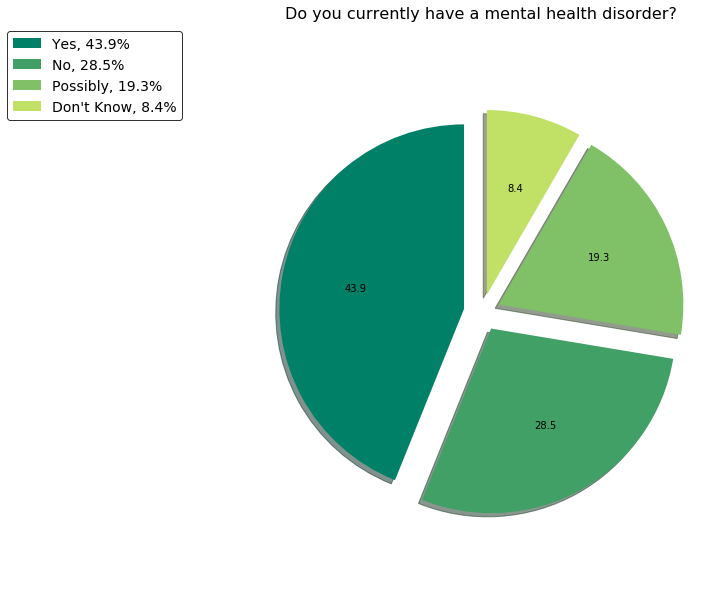

In [426]:
#mental wellness by sample
sdatafile=pd.DataFrame(datafile["Do_you_currently_have_a_mental_health_disorder"].value_counts())

sizes = sdatafile["Do_you_currently_have_a_mental_health_disorder"]
labels =sdatafile.index

explode=(0.1,0.1,0.1,0.1)

fig1, ax = plt.subplots(figsize=(9, 8))
fig1.subplots_adjust(0.3,0,1,1)

theme = plt.get_cmap('summer')
ax.set_prop_cycle("color", [theme(1 * i / len(sizes)) for i in range(len(sizes))])

ax.pie(sizes, startangle=90,  shadow=True, explode=explode,autopct="%1.1f")
plt.title("Do you currently have a mental health disorder?",fontsize = 16)

ax.axis('equal')
total = sum(sizes)
ax.legend(loc='best',
   labels=[f'%s, %1.1f%%' % (l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
   prop={'size': 14}, frameon = True, edgecolor = 'black',
   bbox_to_anchor=(0.2, 1), 
   bbox_transform=fig1.transFigure)

# ax = plt.subplot(111) 
# wedges, texts = ax.pie(np.abs(np.random.randn(5)))

# for w in wedges:
#     w.set_linewidth(2)
#     w.set_edgecolor('black')

plt.savefig("Plots/pie.png")


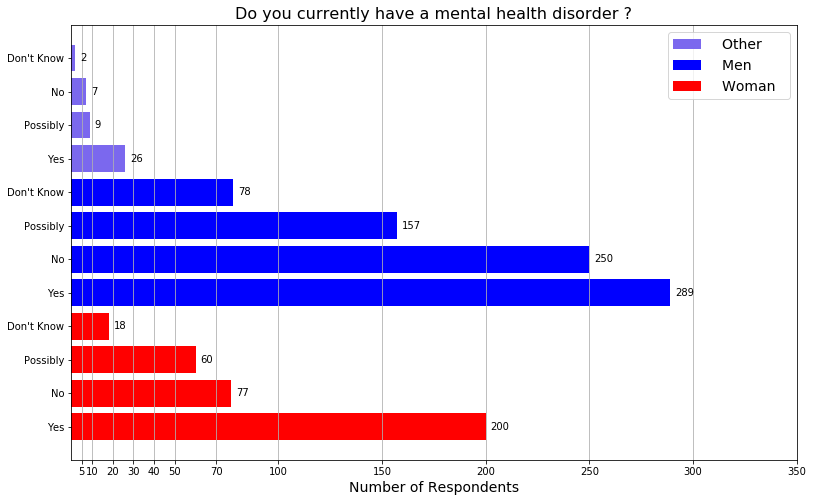

In [428]:
# mental wellness by gender
gdatafile=datafile.groupby(["What_is_your_gender"])
gender=pd.DataFrame(gdatafile["Do_you_currently_have_a_mental_health_disorder"].value_counts())
gender=gender.rename(columns={"Do_you_currently_have_a_mental_health_disorder":"Disorder_Count"})
gender.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(13,8))

x=gender["Disorder_Count"]
y=np.arange(len(gender))

plt.yticks(y,gender["Do_you_currently_have_a_mental_health_disorder"])

x1 = np.arange(12) * 0.1
#y1 = gender["Disorder_Count"].count()
#separating genders
mask1 = x1 < 0.333
mask2 = (x1 >= 0.333) & ( x1 <= .75)
mask3 = x1 > 0.75
#plotting
rects1=ax.barh(y[mask1],x[mask1],  color = 'red')
rects2=ax.barh(y[mask2],x[mask2],  color = 'blue')
rects3=ax.barh(y[mask3],x[mask3],  color = 'mediumslateblue')
#legend
plt.title("Do you currently have a mental health disorder ?", fontsize = 16)
plt.xlabel("Number of Respondents",fontsize=14)
ax.legend((rects3[0], rects2[0], rects1[0]), ('  Other  ','  Men  ','  Woman  '),fontsize=14)

# ax.yaxis.grid() # horizontal lines
ax.xaxis.grid() # vertical lines
ax.xaxis.set_ticks([5.,10.,20.,30.,40.,50.,70.,100.,150.,200.,250.,300.,350.])

#----------------------------------------------------------------------------------------
# For each bar: Place a label
rects = ax.patches

for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

plt.savefig("Plots/hbar.png")


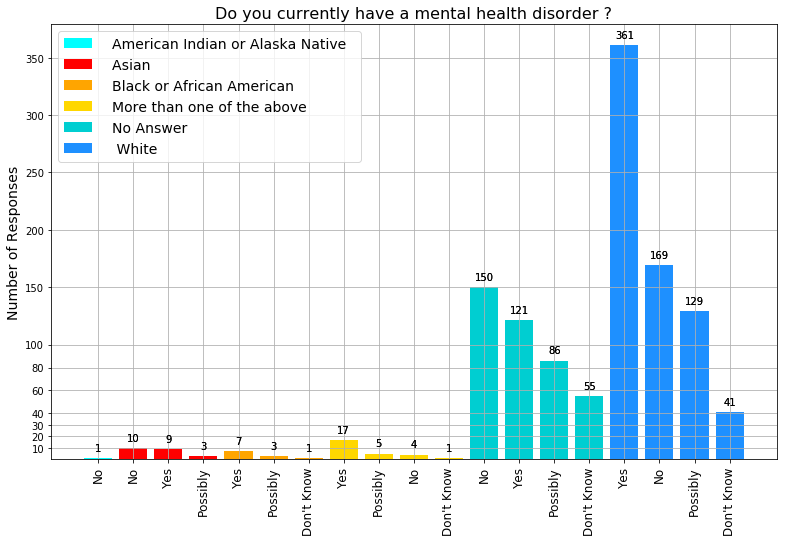

In [429]:
# mental wellness by race
rdatafile=datafile.groupby("What_is_your_race")
race=pd.DataFrame(rdatafile["Do_you_currently_have_a_mental_health_disorder"].value_counts())
race=race.rename(columns={"Do_you_currently_have_a_mental_health_disorder":"Disorder_Count"})
race.reset_index(inplace=True)

x1 = np.arange(19)

mask1=x1 <=0
mask2=(x1 >0) & (x1<=3)
mask3=(x1 >3) & (x1<=6)
mask4=(x1 >6) & (x1<=10)
mask5=(x1 >10) & (x1<=14)
mask6=(x1 >14) & (x1<=18)
#mask7=(x1 >18) & (x1<=23)

fig, ax = plt.subplots(figsize=(13,8))
y=race["Disorder_Count"]
x=np.arange(len(race))
plt.xticks(x,race["Do_you_currently_have_a_mental_health_disorder"],rotation=90,fontsize=12)
plt.bar(x,y)
rects1=ax.bar(x[mask1],y[mask1],  color = 'cyan')
rects2=ax.bar(x[mask2],y[mask2],  color = 'red')
rects3=ax.bar(x[mask3],y[mask3],  color = 'orange')
rects4=ax.bar(x[mask4],y[mask4],  color = 'gold')
rects5=ax.bar(x[mask5],y[mask5],  color = 'darkturquoise')
rects6=ax.bar(x[mask6],y[mask6],  color = 'dodgerblue')
#rects7=ax.bar(x[mask7],y[mask7],  color = 'blueviolet')

plt.title("Do you currently have a mental health disorder ?", fontsize = 16)
plt.ylabel("Number of Responses",fontsize=14)

#--------------------------------------------------------------------------
# Write numbers on top of bars
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        # Invert space to place label below
        space *= -1
        # Vertically align label at top
        va = 'top'

    # Use Y value as label and format number with one decimal place
    label = "{:.0f}".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
                                    # positive and negative values.

# plt.savefig("image.png")

#-------------------------------------------------------------------------
ax.legend((rects1[0], rects2[0], rects3[0],rects4[0], rects5[0], rects6[0]), ('  American Indian or Alaska Native  ','  Asian  ','  Black or African American ','  More than one of the above  ','  No Answer ', '   White   '),fontsize=14)
ax.yaxis.set_ticks([10.,20.,30.,40.,60.,80.,100.,150.,200.,250.,300.,350.])
# #ax = df.plot(kind='bar',  title='Scores')
# ax.set_ylim(0, 370)
# for i, label in enumerate(list(race.What_is_your_race)):
#     score = race.What_is_your_race
#     ax.annotate(str(score), (i, score + 0.8),rotation=90)

ax.grid()
plt.savefig("Plots/bar.png")


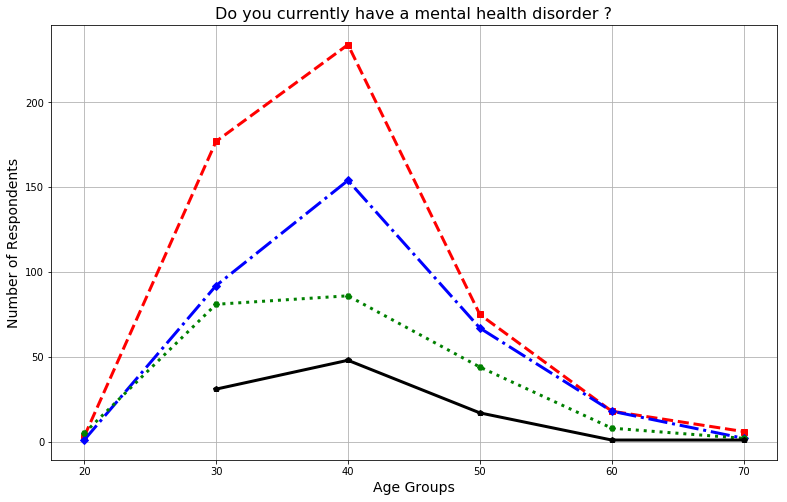

In [431]:
# mental wellness by age
adatafile=datafile.groupby("What_is_your_age")
age=pd.DataFrame(adatafile["Do_you_currently_have_a_mental_health_disorder"].value_counts())
age=age.rename(columns={"Do_you_currently_have_a_mental_health_disorder":"Disorder_Count"})
age.reset_index(inplace=True)
age["What_is_your_age"]=age["What_is_your_age"].replace(to_replace="No Answer",value=-1)
bin=[0,20,30,40,50,60,70]
age["Agegroup"]=pd.cut(age["What_is_your_age"].astype(float),bin)
age=age.groupby(["Agegroup","Do_you_currently_have_a_mental_health_disorder"])
age=pd.DataFrame(age["Disorder_Count"].sum())
age.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(13,8))


yes = age[(age.Do_you_currently_have_a_mental_health_disorder=="Yes")]
no = age[(age.Do_you_currently_have_a_mental_health_disorder=="No")]
possibly = age[(age.Do_you_currently_have_a_mental_health_disorder=="Possibly")]
Dont_Know = age[(age.Do_you_currently_have_a_mental_health_disorder=="Don't Know")]


y = yes.Disorder_Count
y1 = no.Disorder_Count
y2 = possibly.Disorder_Count
y3 = Dont_Know.Disorder_Count

x=[20,30,40,50,60,70]
x2 =[30,40,50,60,70]
#x = ((0, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70))

plt.plot(x,y,linewidth=3, marker="s",linestyle="--", color="r", label="Yes")
plt.plot(x,y1,linewidth=3, marker="D",linestyle="-.", color="b", label="No")
plt.plot(x,y2,linewidth=3, marker="H",linestyle=":", color="g", label="Possibly")
plt.plot(x2,y3,linewidth=3, marker="p",linestyle="-", color="k", label="Possibly")

#legend
plt.title("Do you currently have a mental health disorder ?", fontsize = 16)
plt.ylabel("Number of Respondents",fontsize=14)
plt.xlabel("Age Groups",fontsize=14)

plt.grid()

plt.savefig("Plots/line.png")


In [413]:
age


,Agegroup,Do_you_currently_have_a_mental_health_disorder,Disorder_Count
0,"(0, 20]",No,1
1,"(0, 20]",Possibly,5
2,"(0, 20]",Yes,3
3,"(20, 30]",Don't Know,31
4,"(20, 30]",No,92
5,"(20, 30]",Possibly,81
6,"(20, 30]",Yes,177
7,"(30, 40]",Don't Know,48
8,"(30, 40]",No,154
9,"(30, 40]",Possibly,86


In [124]:
# Most prevalent disorders
headers=list(datafile.columns)
firstdisorderindex=headers.index("Anxiety Disorder (Generalized, Social, Phobia, etc)")
Disorders=headers[firstdisorderindex:]
Disorderfile=pd.DataFrame({"Disordercounts":["No","Yes"]})
Disorderfile.set_index("Disordercounts")
for disorder in Disorders:
    counts=list(datafile[disorder].value_counts())
    Disorderfile[disorder]=counts
Disorderfile



,Disordercounts,"Anxiety Disorder (Generalized, Social, Phobia, etc)","Mood Disorder (Depression, Bipolar Disorder, etc)","Psychotic Disorder (Schizophrenia, Schizoaffective, etc)","Eating Disorder (Anorexia, Bulimia, etc)",Attention Deficit Hyperactivity Disorder,"Personality Disorder (Borderline, Antisocial, Paranoid, etc)",Obsessive-Compulsive Disorder,Post traumatic Stress Disorder,Stress Response Syndromes,Dissociative Disorder,Substance Use Disorder,Addictive Disorder,Other
0,No,1018,660,1160,1136,1003,1128,1105,1068,1134,1159,1136,1142,1149
1,Yes,155,513,13,37,170,45,68,105,39,14,37,31,24


In [143]:
# disorder cause examination - Number of employees
nemp=datafile.groupby("Do you currently have a mental health disorder?")
nemp=nemp["Number of employees"].value_counts()
nemp

Do you currently have a mental health disorder?  Number of employees
Don't Know                                       More than 1000          23
                                                 100-500                 22
                                                 26-100                  20
                                                 No Answer               18
                                                 6-25                    10
                                                 500-1000                 5
No                                               26-100                  76
                                                 100-500                 74
                                                 More than 1000          55
                                                 6-25                    53
                                                 No Answer               50
                                                 500-1000                16
                   

In [149]:
# disorder cause examination - Does your medical coverage include treatment of mental health?
cov=datafile.groupby("Do you currently have a mental health disorder?")
cov=cov["Does your medical coverage include treatment of mental health?"].value_counts()
cov

Do you currently have a mental health disorder?  Does your medical coverage include treatment of mental health?
Don't Know                                       No                                                                 88
                                                 yes                                                                10
No                                               No                                                                299
                                                 yes                                                                35
Possibly                                         No                                                                204
                                                 yes                                                                22
Yes                                              No                                                                462
                                                 yes   

In [151]:
# disorder cause examination - Do you know the options for mental health care available under your employer-provided health coverage?
opt=datafile.groupby("Do you currently have a mental health disorder?")
opt=opt["Do you know the options for mental health care available under your employer-provided health coverage?"].value_counts()
opt

Do you currently have a mental health disorder?  Do you know the options for mental health care available under your employer-provided health coverage?
Don't Know                                       No                                                                                                         78
                                                 Yes                                                                                                        20
No                                               No                                                                                                        240
                                                 Yes                                                                                                        94
Possibly                                         No                                                                                                        161
                                                 Yes 

In [154]:
# disorder cause examination - Have you ever been diagnosed with a mental health disorder?
his=datafile.groupby("Do you currently have a mental health disorder?")
his=his["Have you ever been diagnosed with a mental health disorder?"].value_counts()
his

Do you currently have a mental health disorder?  Have you ever been diagnosed with a mental health disorder?
Don't Know                                       No                                                              98
No                                               No                                                             334
Possibly                                         No                                                             226
Yes                                              Yes                                                            503
                                                 No                                                              12
Name: Have you ever been diagnosed with a mental health disorder?, dtype: int64

In [156]:
# disorder cause examination - Have you had a mental health disorder in the past?
past=datafile.groupby("Do you currently have a mental health disorder?")
past=past["Have you had a mental health disorder in the past?"].value_counts()
past

Do you currently have a mental health disorder?  Have you had a mental health disorder in the past?
Don't Know                                       No                                                     44
                                                 Don't Know                                             36
                                                 Possibly                                               13
                                                 Yes                                                     5
No                                               No                                                    236
                                                 Yes                                                    50
                                                 Possibly                                               41
                                                 Don't Know                                              7
Possibly                                    

In [158]:
# disorder cause examination - Do you have a family history of mental illness?
fam=datafile.groupby("Do you currently have a mental health disorder?")
fam=fam["Do you have a family history of mental illness?"].value_counts()
fam

Do you currently have a mental health disorder?  Do you have a family history of mental illness?
Don't Know                                       No                                                  39
                                                 I don't know                                        31
                                                 Yes                                                 28
No                                               No                                                 190
                                                 Yes                                                 96
                                                 I don't know                                        48
Possibly                                         I don't know                                        88
                                                 Yes                                                 86
                                                 No                    